In [1]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
!tar -xf /content/drive/MyDrive/AXIAL-T1.tar
!tar -xf /content/drive/MyDrive/IXI-T2.tar

In [ ]:
drive.flush_and_unmount()


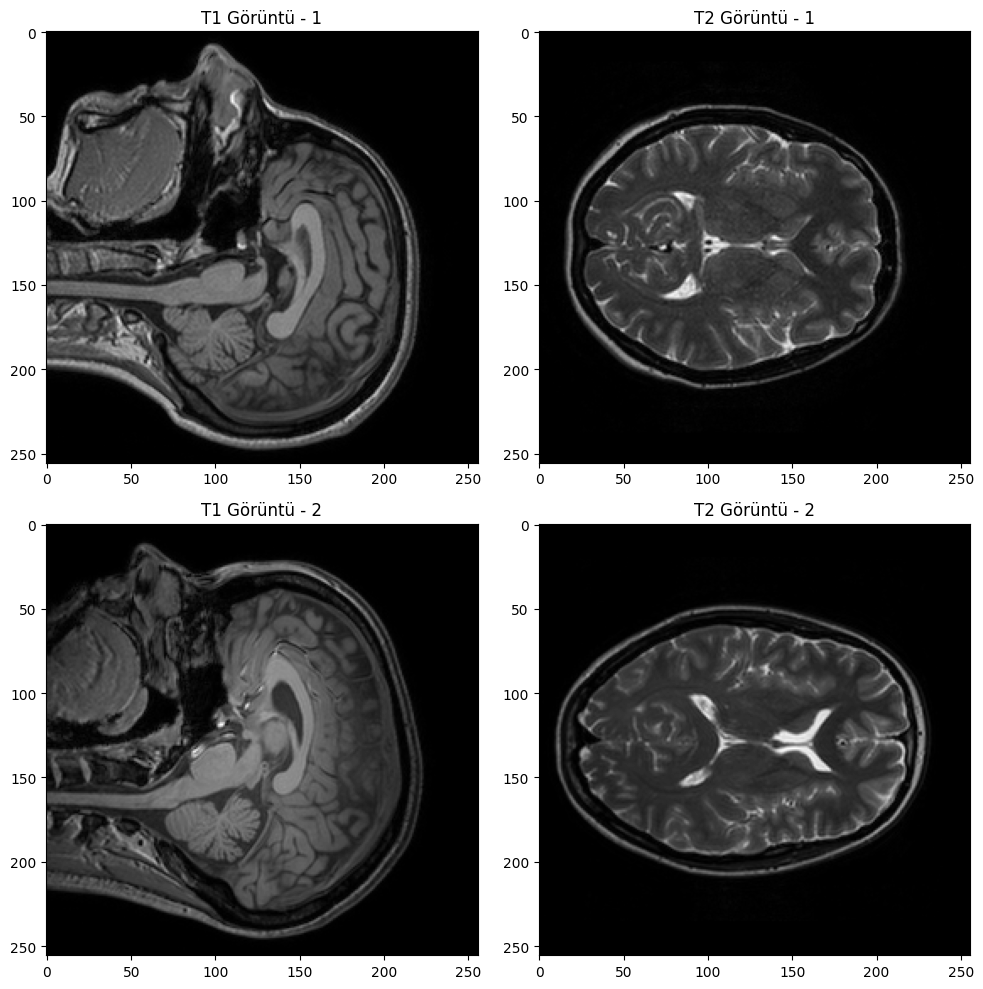

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt

file_path = '/content/IXI002-Guys-0828-T1.nii.gz'
file_path2 = '/content/IXI002-Guys-0828-T2.nii.gz'
file_path3 = '/content/IXI057-HH-1342-T1.nii.gz'
file_path4 = '/content/IXI057-HH-1342-T2.nii.gz'
img = nib.load(file_path)
img2 = nib.load(file_path2)
img3 = nib.load(file_path3)
img4 = nib.load(file_path4)

# convert to numpy array
data = img.get_fdata()
data2 = img2.get_fdata()
data3 = img3.get_fdata()
data4 = img4.get_fdata()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(data[:, :, data.shape[2] // 2], cmap='gray')
axs[0, 0].set_title('T1 Weighted MRI - 1')

axs[0, 1].imshow(data2[:, :, data2.shape[2] // 2], cmap='gray')
axs[0, 1].set_title('T2 Weighted MRI - 1')

axs[1, 0].imshow(data3[:, :, data3.shape[2] // 2], cmap='gray')
axs[1, 0].set_title('T1 Weighted MRI - 2')

axs[1, 1].imshow(data4[:, :, data4.shape[2] // 2], cmap='gray')
axs[1, 1].set_title('T2 Weighted MRI - 2')

plt.tight_layout()

plt.show()


In [ ]:
data4.shape

(256, 256, 130)

In [6]:
#how many t1 are there?

!find /content/ -name "*T1.nii.gz" | wc -l


581


In [7]:
#how many t2 are there?

!find /content/ -name "*T2.nii.gz" | wc -l

578


In [8]:
import os

# Path to the folder
data_folder = '/content'

# List all files
all_files = os.listdir(data_folder)

# Separate T1 and T2 files based on endings
t1_files = [file for file in all_files if file.lower().endswith('t1.nii.gz')]
t2_files = [file for file in all_files if file.lower().endswith('t2.nii.gz')]

# Extract prefixes from file names
t1_prefixes = set(file[:-9] for file in t1_files)  # Removing 'T1.nii.gz'
t2_prefixes = set(file[:-9] for file in t2_files)  # Removing 'T2.nii.gz'

# Find the missing T2 and T1 prefixes
missing_t2_prefixes = t1_prefixes - t2_prefixes
missing_t1_prefixes = t2_prefixes - t1_prefixes

# Print the missing T2 files
print("Missing T2 prefixes:")
for missing_prefix in missing_t2_prefixes:
    missing_t1_file = f"{missing_prefix}T1.nii.gz"
    missing_t2_file = f"{missing_prefix}T2.nii.gz"
    print(f"T1: {missing_t1_file}, Missing T2: {missing_t2_file}")

# Print the missing T1 files
print("Missing T1 prefixes:")
for missing_prefix in missing_t1_prefixes:
    missing_t1_file = f"{missing_prefix}T1.nii.gz"
    missing_t2_file = f"{missing_prefix}T2.nii.gz"
    print(f"T2: {missing_t2_file}, Missing T1: {missing_t1_file}")

# Delete the missing T1 files (corresponding to missing T2 files)
for missing_prefix in missing_t2_prefixes:
    missing_t1_file = f"{missing_prefix}T1.nii.gz"
    file_path = os.path.join(data_folder, missing_t1_file)
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {missing_t1_file}")
    else:
        print(f"File not found: {missing_t1_file}")

# Delete the missing T2 files (corresponding to missing T1 files)
for missing_prefix in missing_t1_prefixes:
    missing_t2_file = f"{missing_prefix}T2.nii.gz"
    file_path = os.path.join(data_folder, missing_t2_file)
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {missing_t2_file}")
    else:
        print(f"File not found: {missing_t2_file}")


Missing T2 prefixes:
T1: IXI116-Guys-0739-T1.nii.gz, Missing T2: IXI116-Guys-0739-T2.nii.gz
T1: IXI500-Guys-1017-T1.nii.gz, Missing T2: IXI500-Guys-1017-T2.nii.gz
T1: IXI182-Guys-0792-T1.nii.gz, Missing T2: IXI182-Guys-0792-T2.nii.gz
T1: IXI309-IOP-0897-T1.nii.gz, Missing T2: IXI309-IOP-0897-T2.nii.gz
Missing T1 prefixes:
T2: IXI580-IOP-1157-T2.nii.gz, Missing T1: IXI580-IOP-1157-T1.nii.gz
Deleted: IXI116-Guys-0739-T1.nii.gz
Deleted: IXI500-Guys-1017-T1.nii.gz
Deleted: IXI182-Guys-0792-T1.nii.gz
Deleted: IXI309-IOP-0897-T1.nii.gz
Deleted: IXI580-IOP-1157-T2.nii.gz


In [9]:
#How many T1 and T2 data are there?
print('Number of T1 files:')
!find /content/ -name "*T1.nii.gz" | wc -l

print('Number of T2 files:')
!find /content/ -name "*T2.nii.gz" | wc -l

Number of T1 files:
577
Number of T2 files:
577


In [10]:
import os
import shutil

source_folder = "/content"
t1_folder = "/content/IXI-T1"
t2_folder = "/content/IXI-T2"

if not os.path.exists(t1_folder):
    os.makedirs(t1_folder)

if not os.path.exists(t2_folder):
    os.makedirs(t2_folder)

all_files = os.listdir(source_folder)
t1_files = [file for file in all_files if file.lower().endswith('t1.nii.gz')]
t2_files = [file for file in all_files if file.lower().endswith('t2.nii.gz')]

# t1 files moved to t1 folder
for t1_file in t1_files:
    source_path = os.path.join(source_folder, t1_file)
    destination_path = os.path.join(t1_folder, t1_file)
    shutil.move(source_path, destination_path)

# t2 files moved to t2 folder
for t2_file in t2_files:
    source_path = os.path.join(source_folder, t2_file)
    destination_path = os.path.join(t2_folder, t2_file)
    shutil.move(source_path, destination_path)

print("Files moved.")


Files moved.


In [ ]:
!pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 14.3 MB/s eta 0:00:00


In [ ]:
import os
from nilearn import image

t1_directory = "/content/IXI-T1"

t2_directory = "/content/IXI-T2"

# Path to the new directory where the registered T1 images will be saved
new_directory = os.path.join(t1_directory, 'AXIAL-T1')

# Create the new directory if it doesn't exist
os.makedirs(new_directory, exist_ok=True)

# List all T1 files in the directory
t1_files = [f for f in os.listdir(t1_directory) if f.endswith('.nii.gz')]
x=0
# Loop over T1 files
for t1_file in t1_files:
    # Extract subject ID from the T1 file name ('xxx-T1.nii.gz' --> 'xxx-')
    subject_id = t1_file.split('T1')[0]

    # Form the corresponding T2 file name
    t2_file = f"{subject_id}T2.nii.gz"

    # Create the full paths for T1 and T2 files
    t1_file_path = os.path.join(t1_directory, t1_file)
    t2_file_path = os.path.join(t2_directory, t2_file)

    # Check if the corresponding T2 file exists
    if os.path.exists(t2_file_path):
        # Load the T1 image to register
        t1_img = image.load_img(t1_file_path)

        # Load the T2 reference image
        t2_reference_img = image.load_img(t2_file_path)

        # Register the T1 image to the T2 reference (t1(sagittal) --- t2(axial) --> t1(axial))
        registered_t1_img = image.resample_to_img(t1_img, t2_reference_img, interpolation='nearest')
        x=x+1
        # Save the registered T1 image in the new directory
        new_filename = f"{t1_file}"
        new_filepath = os.path.join(new_directory, new_filename)
        registered_t1_img.to_filename(new_filepath)
        print(f'dosya: {x}')


dosya: 1
dosya: 2
dosya: 3
dosya: 4
dosya: 5
dosya: 6
dosya: 7
dosya: 8
dosya: 9
dosya: 10
dosya: 11
dosya: 12
dosya: 13
dosya: 14
dosya: 15
dosya: 16
dosya: 17
dosya: 18
dosya: 19
dosya: 20
dosya: 21
dosya: 22
dosya: 23
dosya: 24
dosya: 25
dosya: 26
dosya: 27
dosya: 28
dosya: 29
dosya: 30
dosya: 31
dosya: 32
dosya: 33
dosya: 34
dosya: 35
dosya: 36
dosya: 37
dosya: 38
dosya: 39
dosya: 40
dosya: 41
dosya: 42
dosya: 43
dosya: 44
dosya: 45
dosya: 46
dosya: 47
dosya: 48
dosya: 49
dosya: 50
dosya: 51
dosya: 52
dosya: 53
dosya: 54
dosya: 55
dosya: 56
dosya: 57
dosya: 58
dosya: 59
dosya: 60
dosya: 61
dosya: 62
dosya: 63
dosya: 64
dosya: 65
dosya: 66
dosya: 67
dosya: 68
dosya: 69
dosya: 70
dosya: 71
dosya: 72
dosya: 73
dosya: 74
dosya: 75
dosya: 76
dosya: 77
dosya: 78
dosya: 79
dosya: 80
dosya: 81
dosya: 82
dosya: 83
dosya: 84
dosya: 85
dosya: 86
dosya: 87
dosya: 88
dosya: 89
dosya: 90
dosya: 91
dosya: 92
dosya: 93
dosya: 94
dosya: 95
dosya: 96
dosya: 97
dosya: 98
dosya: 99
dosya: 100
dosya: 1

In [ ]:
import tarfile

drive.mount('/content/drive')

source_folder = "/content/IXI-T1/AXIAL-T1"
tar_filename = "/content/drive/MyDrive/AXIAL-T1.tar"

nii_files = [file for file in os.listdir(source_folder) if file.endswith('.nii.gz')]

with tarfile.open(tar_filename, 'w') as tar:
    for nii_file in nii_files:
        file_path = os.path.join(source_folder, nii_file)
        tar.add(file_path, arcname=os.path.basename(file_path))

print(f"{tar_filename} is saved to Google Drive.")


In [11]:
import os
import shutil

files_t1 = os.listdir('IXI-T1')
files_t1.sort()

files_t2 = os.listdir('IXI-T2')
files_t2.sort()

os.mkdir('train')

os.mkdir('test')

# Iterate over the first 477 files in the sorted IXI-T1 folder
for i in range(477):
    shutil.copy('IXI-T1/' + files_t1[i], 'train/')
    shutil.copy('IXI-T2/' + files_t2[i], 'train/')

# Iterate over the next 100 files in the sorted IXI-T1 folder
for i in range(100):
    shutil.copy('IXI-T1/' + files_t1[i + 400], 'test/')
    shutil.copy('IXI-T2/' + files_t2[i + 400], 'test/')



In [15]:
file = '/content/test/IXI450-Guys-1093-T2.nii.gz'
img = nib.load(file)

# convert to numpy array
data = img.get_fdata()
data.shape

(256, 256, 130)

In [ ]:
################### GET THE MIDDLE SLICE OF MRI AND CONVERT IT TO .JPEG FORMAT ###################
import numpy as np
import nibabel as nib
from PIL import Image

def process_and_save_images(input_folder, output_folder):
    # Sort all the files
    file_list = sorted(os.listdir(input_folder))

    # Output
    os.makedirs(output_folder, exist_ok=True)

    for i in range(0, len(file_list), 2):
        # Read files
        t1_path = os.path.join(input_folder, file_list[i])
        t2_path = os.path.join(input_folder, file_list[i + 1])

        # NIfTI files
        t1_data = nib.load(t1_path).get_fdata()
        t2_data = nib.load(t2_path).get_fdata()

        # Get the middle slice
        middle_slice = t1_data.shape[2] // 2

        t1_slice = t1_data[:, :, middle_slice]
        t2_slice = t2_data[:, :, middle_slice]

        # Normalization
        t1_slice_normalized = (t1_slice - np.min(t1_slice)) / (np.max(t1_slice) - np.min(t1_slice))
        t2_slice_normalized = (t2_slice - np.min(t2_slice)) / (np.max(t2_slice) - np.min(t2_slice))

        # Concatenate t1 and t2 images for pix2pix model
        merged_image = np.concatenate([t1_slice_normalized, t2_slice_normalized], axis=1)

        output_path = os.path.join(output_folder, f'test{i//2 + 1}.jpg')
        Image.fromarray((merged_image * 255).astype(np.uint8)).save(output_path, quality=95)


# Repeat same function for test folder, too!
if __name__ == "__main__":
    input_folder = "/content/train" #Input (/content/test)
    output_folder = "/content/train_jpg"  #Output (/content/test_jpg)
    # Output
    os.makedirs(output_folder, exist_ok=True)

    # Call the function
    process_and_save_images(input_folder, output_folder)


In [ ]:
import shutil

# compress the file
shutil.make_archive("/content/train_new", 'zip', "/content/train_jpg")


shutil.move("/content/train_new.zip", "/content/drive/MyDrive/")



'/content/drive/MyDrive/train_new.zip'